# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [3]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
warnings.filterwarnings('ignore')

In [4]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [5]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour
del bikes.index.name

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [8]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [9]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

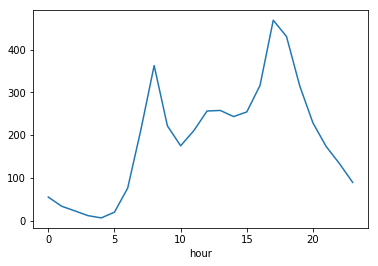

In [11]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

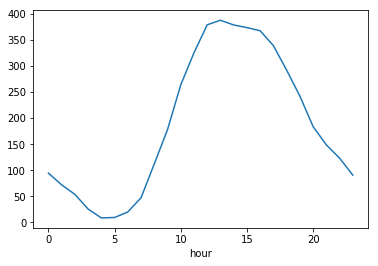

In [12]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

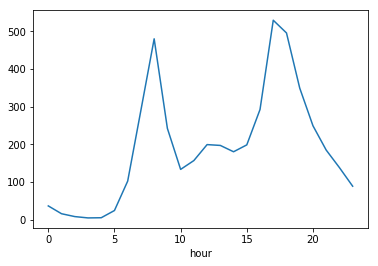

In [13]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

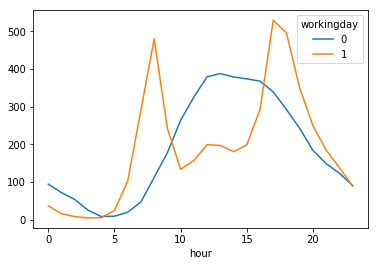

In [14]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Definir Variables
x=bikes[['hour','workingday']]
y=bikes[['total']]

#Partir sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

#Modelo de reg Lineal
linreg=LinearRegression().fit(X_train,y_train)

In [16]:
linreg.score(X_test,y_test)

0.16170753923674497

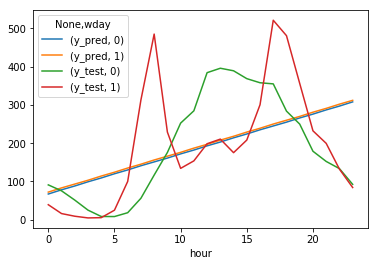

In [17]:
val=round(pd.DataFrame(linreg.predict(X_test),columns=['y_pred']),0)
val['y_test']=y_test.reset_index()['total']
val['hour']=y_test.index.hour
val['wday']=X_test.reset_index()[['workingday']]

# plot the predictions
val.groupby(['hour','wday'])['y_pred','y_test'].mean().unstack().plot()

Se puede ver facilmente que la regresión lineal  no es un buen modelo para ajustar la predicción de los datos dados sus fuertes supuestos de linealidad entre las variables.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [154]:
#Crear el dataframe para trabajar
df=bikes[['workingday','hour','total']]
df.reset_index(inplace=True,drop=True)

In [155]:
#Funcion para comparar variables
def criterio(df):
    def error_hora(df):
        mse=1000000000
        for i in df.hour.unique():
            df['pred'] = df.loc[df.hour<i, 'total'].mean()
            df.loc[df.hour>=i, 'pred'] = df.loc[df.hour>=i, 'total'].mean()
            if mse>(((df['total'] - df['pred'])**2).mean()) ** 0.5:
                mse=(((df['total'] - df['pred'])**2).mean()) ** 0.5
                hora=i
        return mse,hora
    
    def error_dia(df): 
        mse=1000000000
        for i in df.workingday.unique():
            df['pred'] = df.loc[df.workingday<i, 'total'].mean()
            df.loc[df.workingday>=i, 'pred'] = df.loc[df.workingday>=i, 'total'].mean()
            if mse>(((df['total'] - df['pred'])**2).mean()) ** 0.5:
                mse=(((df['total'] - df['pred'])**2).mean()) ** 0.5
                wday=i
        return mse,wday
    
    if error_hora(df)[0]>error_dia(df)[0]:
        mse=error_dia(df)[0]
        var=error_dia(df)[1]
        name='wday'
        return name,var,mse
    else:
        mse=error_hora(df)[0]
        var=error_hora(df)[1]
        name='hora'
        return name,var,mse

In [175]:
#Criterio de partición 1
criterio(df)

('hora', 7, 150.22560060405686)

In [176]:
#Primera división del df
left_df1=df.loc[df.hour<7].copy()
right_df1=df.loc[df.hour>=7].copy()

In [177]:
#Criterio de partición 2, primer nivel, nodo izquierdo
criterio(left_df1)

('hora', 6, 35.24426946227024)

In [178]:
#Primera división del df
left_left_df2=left_df1.loc[left_df1.hour<6].copy()
left_right_df2=left_df1.loc[left_df1.hour>=6].copy()

In [179]:
#Criterio de partición 3
criterio(left_left_df2)

('hora', 2, 27.46590337533093)

In [180]:
#Primera división del df
left_left_left_df3=df.loc[df.hour<2].copy()
left_left_right_df3=df.loc[df.hour>=2].copy()

In [181]:
#Criterio de partición 4
criterio(right_df1)

('hora', 21, 166.69864069956597)

In [182]:
#Primera división del df
right_left_df2=df.loc[df.hour<21].copy()
right_right_df2=df.loc[df.hour>=21].copy()

In [183]:
#Criterio de partición 5
criterio(right_right_df2)

('hora', 23, 72.98864033487493)

In [184]:
#Primera división del df
right_right_left_df2=df.loc[df.hour<23].copy()
right_right_right_df2=df.loc[df.hour>=23].copy()

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [207]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#Entrenar modelo
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [208]:
#Calcular RMSE
scores = cross_val_score(treereg, X_test, y_test, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.83338625037929

In [209]:
treereg.score(X_test, y_test)

0.654883658627931